  # Premiers pas avec Jupyter Notebook # 


## I - Fonctions de bases

* Python est un language interprété, très utilisé 
* 2 modes: interactif (jupyter notebook), script

Exemple simple d'utilisation de jupyter notebook:

In [3]:
café = "chaud"
Café = "froid"
Cafe = "frappé"
print(café, Café, Cafe)

chaud froid frappé


* Différents types de variables 

In [14]:
a = 2                  # <class "int">, nbr entier
print(type(a)) 

<class 'int'>


In [15]:
a = 2.5               # <class "float">, nbr flottant
print(type(a))

<class 'float'>


In [18]:
a = True              #<class "bool", booléen, variable a 2 états
print(type(a))

<class 'bool'>


In [19]:
a = "café"          #<class "str",chaine
print(type(a))

<class 'str'>


* Operations de base 

In [27]:
X = 3
Y = 4
print("X =",X, "Y =",Y)

#Addition
print("addition, X+Y=",X+Y)

#Multiplication
print("multiplication, X*Y=",X*Y)

#Division
print("division, X/Y=",X/Y)

#Puissance
print("puissance, X^Y=", X**Y)

X = 3 Y = 4
addition, X+Y= 7
multiplication, X*Y= 12
division, X/Y= 0.75
puissance, X^Y= 81


* Comparaisons

In [ ]:
X = 3
Y = 4

#Egal
print("Egal", X==Y)  #false

#Different
print("different", X!=Y) #true

#Superieur ou egale
print("superieur ou egale", X>=Y) #false

* Affectations

In [ ]:
X = 3
Y = 4

X += Y   #X=X+Y
print("X=",X)

X *= Y
print("X*Y",X) #X=X*Y

* Entrées/Sorties

In [16]:
print("bonjour")
a = 2; b = 3
print("mangez", a, "pommes et ",b, "poires") 

bonjour
mangez 2 pommes et  3 poires


* Petits problemes pour s'entrainer

1) La roulette


 - Le joueur mise sur un numero compris entre 0 et 49
 - Lesnumeros pairs sont noirs, les impairs sont rouges
 - Le croupier lance la roulette, lache la bille et quand la roulette s'arrete, il regarde le numero de la case dans laquelle la   bille s'est arretée
 - si le numero gagnant est celui sur lequel le jour a misé = il gagne 3 fois sa mise
 - si le numero est de la même couleur que celui sur lequel le joueur a misé = il gagne 50% de sa mise
 - sinon le joueur perd sa mise 
 

Aides: 
- fonction randrange du module random pour tirer les numeros
- fonction ceil du module math pour ne pas avoir de nbr flottants, arrondir au nombre supérieur (interessant pour la mise) 
- mise départ: 500€

In [20]:
import os
from random import randrange
from math import ceil

In [23]:
# Variables de départ
argent = 500 # On a 500 $ au début du jeu
continuer_partie = True 

print("Vous vous installez à la table de roulette avec", argent, "$.")

while continuer_partie:
    nombre_mise = -1
    while nombre_mise < 0 or nombre_mise > 49:
        nombre_mise = input("Tapez le nombre sur lequel vous voulez miser (entre 0 et 49) : ")

        try:
            nombre_mise = int(nombre_mise)
        except ValueError:
            print("Vous n'avez pas saisi de nombre")
            nombre_mise = -1
            continue
        if nombre_mise < 0:
            print("Ce nombre est négatif")
        if nombre_mise > 49:
            print("Ce nombre est supérieur à 49")

    # somme à miser sur le nombre
    mise = 0
    while mise <= 0 or mise > argent:
        mise = input("Tapez le montant de votre mise : ")
        # On convertit la mise
        try:
            mise = int(mise)
        except ValueError:
            print("Vous n'avez pas saisi de nombre")
            mise = -1
            continue
        if mise <= 0:
            print("La mise saisie est négative ou nulle.")
        if mise > argent:
            print("Vous ne pouvez miser autant, vous n'avez que", argent, "$")

   
    # On fait tourner la roulette
    numero_gagnant = randrange(50)
    print("La roulette tourne... ... et s'arrête sur le numéro", numero_gagnant)

    # On établit le gain du joueur
    if numero_gagnant == nombre_mise:
        print("Félicitations ! Vous obtenez", mise * 3, "$ !")
        argent += mise * 3
    elif numero_gagnant % 2 == nombre_mise % 2: # ils sont de la même couleur
        mise = ceil(mise * 0.5)
        print("Vous avez misé sur la bonne couleur. Vous obtenez", mise, "$")
        argent += mise
    else:
        print("Désolé, Vous perdez votre mise.")
        argent -= mise

    # On interrompt la partie si le joueur est ruiné
    if argent <= 0:
        print("Vous êtes ruiné ! C'est la fin de la partie.")
        continuer_partie = False
    else:
        # On affiche l'argent du joueur
        print("Vous avez à présent", argent, "$")
        quitter = input("Souhaitez-vous quitter le casino (o/n) ? ")
        if quitter == "o" or quitter == "O":
            print("Vous quittez le casino avec vos gains.")
            continuer_partie = False

# On met en pause le système (Windows)
os.system("pause")

TypeError: 'module' object is not callable

Peut être pas le meilleur script a tester sur jupyter notebook, mais marche tres bien sur spyder 

## II - Fonctions avancées (direct bam bam !) ##

### II.I BRIAN (simulator for spiking neural networks) ###

conda install -c conda-forge brian2 (installation de brian2 avec Anaconda)

* Exemple 1: neurone unique

Text(0, 0.5, 'voltage (V)')

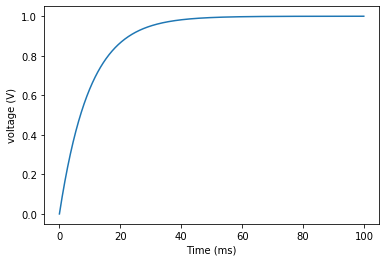

In [3]:

from brian2 import *
%matplotlib inline 

tau = 10*ms #tau = 1/f
eqs = ''' 
dv/dt = (1-v)/tau : 1 
'''

G = NeuronGroup(1, eqs,method='euler')  #G: groupe de neurones (le nbr de neurones, equation differentielle, methode)
M = StateMonitor(G, 'v', record=0) 
run(100*ms)   #lance la simulation pendant 100ms

plot(M.t/ms, M.v[0], 'C0')
xlabel('Time (ms)')
ylabel('voltage (V)')





* Exemple 2: Neurones multiples

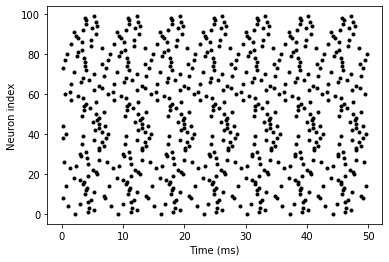

In [4]:
start_scope ()

N = 100 #population de 100 neurones ici
tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', method='exact') #des qu'on atteint le seuil, on revient a 0
G.v = 'rand()' 

spikemon = SpikeMonitor(G)

run(50*ms)

plot(spikemon.t/ms, spikemon.i, '.k') #raster plot
xlabel('Time (ms)')
ylabel('Neuron index');

### II.II Pytorch ###  

 Machine learning library

* Exemple 1: Reseau feed-forward

In [ ]:
print n